<a href="https://colab.research.google.com/github/Azariagmt/Telecom-Analysis/blob/notebooks/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
import pandas as pd 
import numpy as np 
%run "./utils.ipynb"

In [2]:

df_clean = pd.read_csv('../data/clean_df.csv')
scaled_sessions_df = pd.read_csv('../data/scaled_sessions_df.csv')
sessions_df = pd.read_csv('../data/sessions_df.csv')

/home/sem/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


####  top 3 handset manufacturers


In [3]:
n = 3
top_3_handsets = df_clean[df_clean['Handset Manufacturer'] != 'undefined']['Handset Manufacturer'].value_counts()[:n].index.tolist()
top_3_handsets

['Apple', 'Samsung', 'Huawei']

In [4]:
df_clean['Handset Manufacturer'].value_counts()[:3]

Apple      59464
Samsung    40579
Huawei     34366
Name: Handset Manufacturer, dtype: int64

#### top 10 handsets used by the customers

In [5]:
n = 10
df_clean[df_clean['Handset Type'] != 'undefined']['Handset Type'].value_counts()[:n].index.tolist()

['Huawei B528S-23A',
 'Apple iPhone 6S (A1688)',
 'Apple iPhone 6 (A1586)',
 'Apple iPhone 7 (A1778)',
 'Apple iPhone Se (A1723)',
 'Apple iPhone 8 (A1905)',
 'Apple iPhone Xr (A2105)',
 'Samsung Galaxy S8 (Sm-G950F)',
 'Apple iPhone X (A1901)',
 'Samsung Galaxy A5 Sm-A520F']

####  top 5 handsets per top 3 handset manufacturer


In [6]:
top_3_handsets_df = df_clean[df_clean['Handset Manufacturer'].isin(top_3_handsets)]
n = 5
for manufacturer in top_3_handsets:
  handsets = top_3_handsets_df[top_3_handsets_df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts()[:n].index.tolist()
  for item in handsets:
    val = top_3_handsets_df[top_3_handsets_df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts()[item]
    print(f'{item} with {val} number of devices')

Apple iPhone 6S (A1688) with 9413 number of devices
Apple iPhone 6 (A1586) with 9012 number of devices
Apple iPhone 7 (A1778) with 6304 number of devices
Apple iPhone Se (A1723) with 5176 number of devices
Apple iPhone 8 (A1905) with 4985 number of devices
Samsung Galaxy S8 (Sm-G950F) with 4480 number of devices
Samsung Galaxy A5 Sm-A520F with 3708 number of devices
Samsung Galaxy J5 (Sm-J530) with 3682 number of devices
Samsung Galaxy J3 (Sm-J330) with 3464 number of devices
Samsung Galaxy S7 (Sm-G930X) with 3176 number of devices
Huawei B528S-23A with 19727 number of devices
Huawei E5180 with 2074 number of devices
Huawei P20 Lite Huawei Nova 3E with 2018 number of devices
Huawei P20 with 1479 number of devices
Huawei Y6 2018 with 997 number of devices


#### number of xDR sessions

In [8]:
# df.copy()
# 150001
len(df_clean)

148935

just saw that there is a duration column

#### total download (DL) and upload (UL) data


In [9]:
df_clean['Total DL'].sum()

67709590.86951901

In [10]:
df_clean['Total UL'].sum()

6123855.641534001

#### total data volume (in Bytes) during this session for each application

In [14]:
social_medias = ['Social Media DL',
 'Social Media UL',
 'Google DL',
 'Google UL',
 'Email DL',
 'Email UL',
 'Youtube DL',
 'Youtube UL',
 'Netflix DL',
 'Netflix UL',
 'Gaming DL',
 'Gaming UL',
 'Other DL',
 'Other UL',
 'Total UL',
 'Total DL']
social_media_object = []
for social_media in social_medias:
  print(f'{df_clean[social_media]} has {df_clean[social_media].sum()} Mega Bytes used in sessions')
  social_media_object.append((social_media, df_clean[social_media].sum()))
print(social_media_object)

0         1.545765
1         1.926113
2         1.684053
3         0.644121
4         0.862600
            ...   
148930    0.962097
148931    3.464974
148932    2.344568
148933    1.245845
148934    0.801547
Name: Social Media DL, Length: 148935, dtype: float64 has 267362.34630800004 Mega Bytes used in session
0         0.024420
1         0.007165
2         0.042224
3         0.013372
4         0.050188
            ...   
148930    0.031078
148931    0.052091
148932    0.007613
148933    0.014394
148934    0.021562
Name: Social Media UL, Length: 148935, dtype: float64 has 4903.195784 Mega Bytes used in session
0         1.634479
1         3.493924
2         8.535055
3         9.023734
4         6.248284
            ...   
148930    1.139573
148931    9.967603
148932    2.229420
148933    3.850890
148934    4.189773
Name: Google DL, Length: 148935, dtype: float64 has 856610.701179 Mega Bytes used in session
0         1.271433
1         0.920172
2         1.694064
3         2.788027
4  

### Non graphical Univariate analysis

In [19]:
df_clean[['duration',"Total DL",'Total UL']].describe()

duration       Total DL       Total UL
count  1.489350e+05  148935.000000  148935.000000
mean   1.048707e+05     454.625111      41.117640
std    8.106342e+04     244.152774      11.279332
min    7.143000e+03       7.114041       2.866892
25%    5.788400e+04     243.099622      33.217741
50%    8.640000e+04     455.870838      41.141014
75%    1.327005e+05     665.657655      49.032476
max    1.859337e+06     902.969616      78.331311

In [20]:
df_clean[social_medias].describe()

Social Media DL  Social Media UL      Google DL      Google UL  \
count    148935.000000    148935.000000  148935.000000  148935.000000   
mean          1.795161         0.032922       5.751574       2.056217   
std           1.035458         0.019007       3.309041       1.189936   
min           0.000012         0.000000       0.000207       0.000003   
25%           0.898958         0.016438       2.882538       1.023948   
50%           1.793766         0.032914       5.767387       2.053879   
75%           2.694884         0.049327       8.624448       3.088343   
max           3.586064         0.065870      11.462832       4.121357   

            Email DL       Email UL     Youtube DL     Youtube UL  \
count  148935.000000  148935.000000  148935.000000  148935.000000   
mean        1.791769       0.467389      11.633450      11.008671   
std         1.035910       0.269975       6.711384       6.345428   
min         0.000014       0.000002       0.000053       0.000105   
25%         0.892652       0.233424       5.831331       5.516710   
50%         1.793585       0.466357      11.616383      11.013286   
75%         2.689637       0.700443      17.445706      16.514421   
max         3.586146       0.936418      23.259098      22.011962   

          Netflix DL     Netflix UL      Gaming DL      Gaming UL  \
count  148935.000000  148935.000000  148935.000000  148935.000000   
mean       11.627558      11.000165     422.025598       8.289085   
std         6.724686       6.358918     243.976284       4.782090   
min         0.000042       0.000035       0.002516       0.000059   
25%         5.779947       5.474451     210.458703       4.130162   
50%        11.642690      10.995627     423.420796       8.291222   
75%        17.470720      16.504292     633.162012      12.431836   
max        23.259189      22.011955     843.441889      16.558794   

            Other DL       Other UL       Total UL       Total DL  
count  148935.000000  148935.000000  148935.000000  148935.000000  
mean      421.147309       8.263189      41.117640     454.625111  
std       243.197032       4.768708      11.279332     244.152774  
min         0.003290       0.000148       2.866892       7.114041  
25%       210.211895       4.145072      33.217741     243.099622  
50%       421.871574       8.266089      41.141014     455.870838  
75%       631.660212      12.382039      49.032476     665.657655  
max       843.442489      16.558816      78.331311     902.969616

### Graphical Univariate Analysis

In [24]:
# df[['duration',"HTTP DL (Bytes)",'HTTP UL (Bytes)']]
scaled_sessions_df
scaled_sessions_df[['Dur. (ms)',"Total DL",'Total UL']]
scaled_sessions_df[["Total DL",'Total UL']].isnull().sum()
graph_df = scaled_sessions_df[scaled_sessions_df[["Dur. (ms)","Total UL",'Total DL']].notnull()]


In [25]:
graph_df = graph_df[["Dur. (ms)","Total UL",'Total DL']]
graph_df

Dur. (ms)  Total UL  Total DL
0        0.005155  0.079246  0.008575
1        0.005155  0.047377  0.022828
2        0.004253  0.070080  0.002768
3        0.004266  0.042268  0.047140
4        0.005155  0.094203  0.116955
...           ...       ...       ...
106850   0.005155  0.060447  0.068919
106851   0.006482  0.042687  0.083455
106852   0.008702  0.057555  0.054289
106853   0.004273  0.037826  0.036696
106854   0.002667  0.058093  0.097178

[106855 rows x 3 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# mix-max scale the data between 0 and 1
def scaler(df):
    scaled_data = minmax_scaler.fit_transform(df)

    # plot both together to compare
    # fig, ax = plt.subplots(1,2, figsize=(10, 6))
    # sns.histplot(df[['duration',"HTTP DL (Bytes)",'HTTP UL (Bytes)']], ax=ax[0])
    # ax[0].set_title("Original Data")
    # sns.histplot(scaled_data, ax=ax[1])
    # ax[1].set_title("Scaled data")
    return scaled_data
    
scaled_data = scaler(graph_df)
scaled_df = pd.DataFrame(scaled_data)
scaled_df.columns = ['duration',"HTTP DL (Bytes)",'HTTP UL (Bytes)']

Empty DataFrame
Columns: [duration, HTTP DL (Bytes), HTTP UL (Bytes)]
Index: []

In [ ]:
scaled_df = scaled_df.dropna()
scaled_df['duration'].isnull().sum()

0

In [ ]:
scaled_df.describe()

duration  HTTP DL (Bytes)  HTTP UL (Bytes)
count  150000.000000  150000.000000    150000.000000  
mean   0.052622       0.506919         0.499555       
std    0.043752       0.149427         0.272525       
min    0.000000       0.000000         0.000000       
25%    0.027156       0.402244         0.263427       
50%    0.042791       0.507211         0.500892       
75%    0.067643       0.611776         0.735154       
max    1.000000       1.000000         1.000000

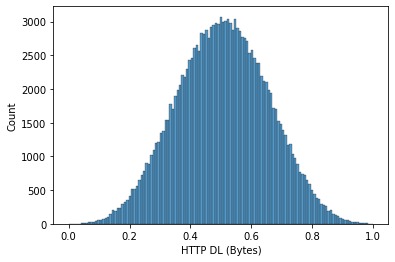

In [ ]:
sns.histplot(scaled_df['HTTP DL (Bytes)'])

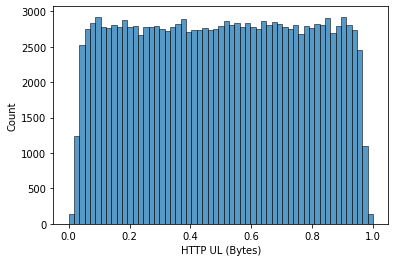

In [ ]:
sns.histplot(scaled_df['HTTP UL (Bytes)'])

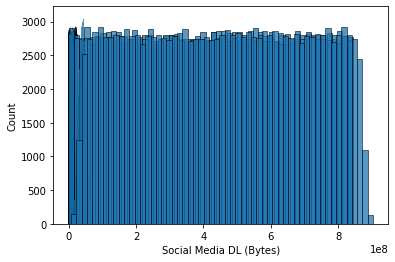

In [ ]:
for social_media in social_medias:
  sns.histplot(df[social_media])

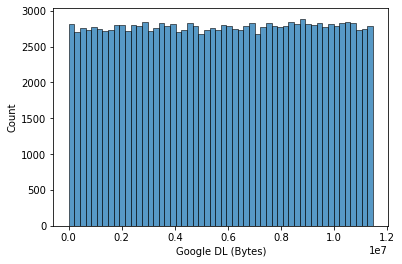

In [ ]:
sns.histplot(df['Google DL (Bytes)'])

In [ ]:
scaled_df = df[Google DL (Bytes)]

SyntaxError: ignored

In [ ]:
social_medias

['Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

In [ ]:
scaled_df

duration  HTTP DL (Bytes)  HTTP UL (Bytes)
0       0.980734  0.448991         0.336846       
1       0.733163  0.674934         0.721401       
2       0.731359  0.331504         0.304394       
3       0.709627  0.536111         0.936439       
4       0.584100  0.472752         0.627361       
...          ...       ...              ...       
149995  0.028315  0.674205         0.906287       
149996  0.040000  0.725666         0.632983       
149997  0.049038  0.480600         0.736207       
149998  0.049188  0.424642         0.653758       
149999  0.049006  0.354594         0.407188       

[150000 rows x 3 columns]

Minimum:204047108489451.00
Mean:208201580319430.94
Median:208201546185125.00
Mode:204047108489451.00
Maximum:208252167239575.00

Minimum:1.00
Mean:1.39
Median:1.00
Mode:1.00
Maximum:18.00

Minimum:7142.00
Mean:146168.52
Median:102741.00
Mode:86399.00
Maximum:18553754.00

Minimum:2.87
Mean:57.31
Median:46.79
Mode:20.40
Maximum:729.58

Minimum:8.83
Mean:633.66
Median:570.37
Mode:502.47
Maximum:8156.74

/home/sem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/sem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/sem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a n

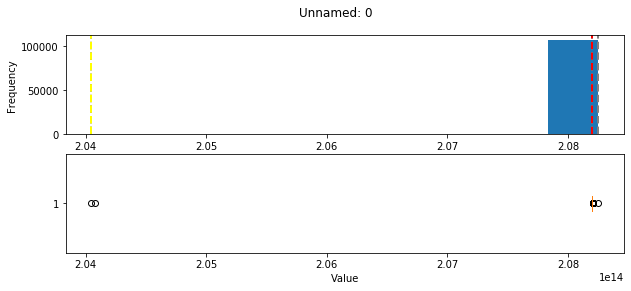

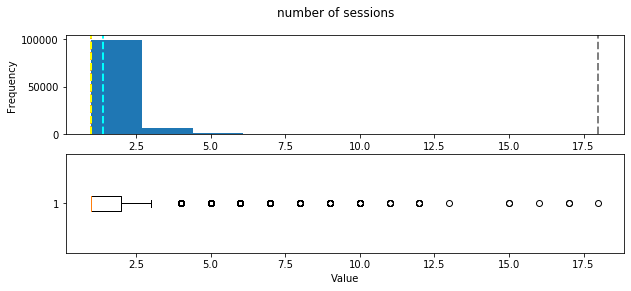

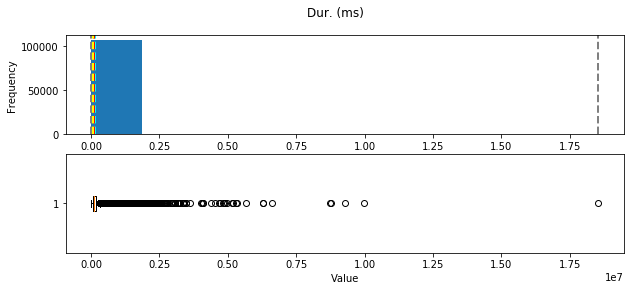

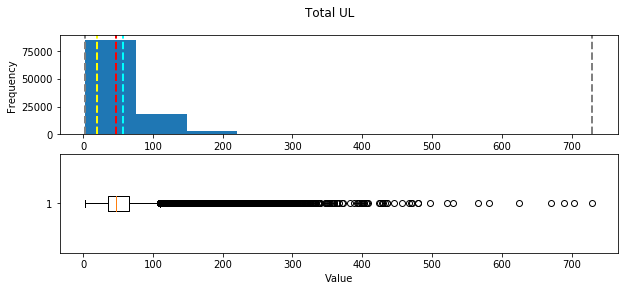

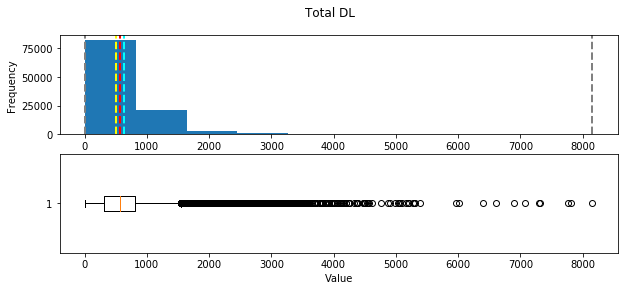

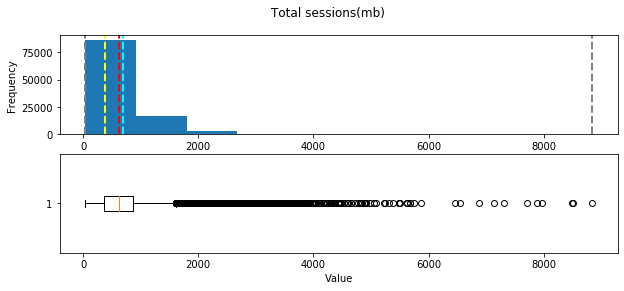

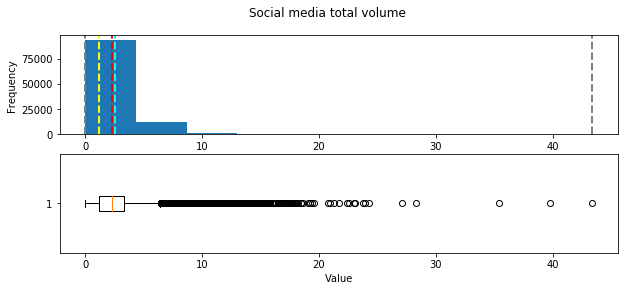

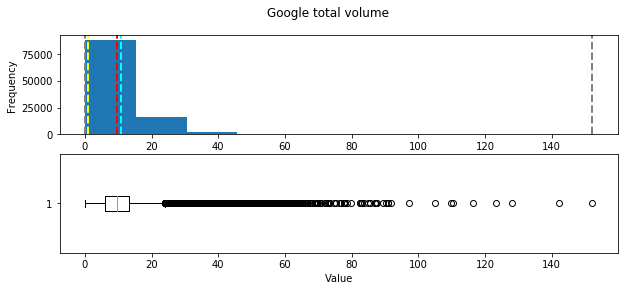

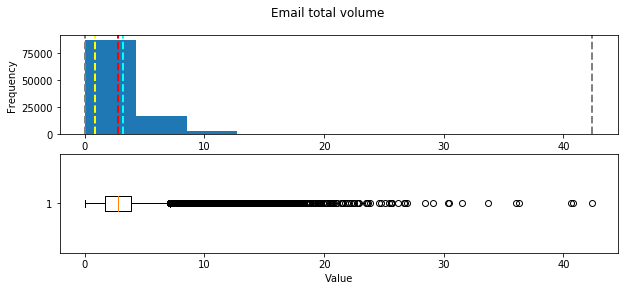

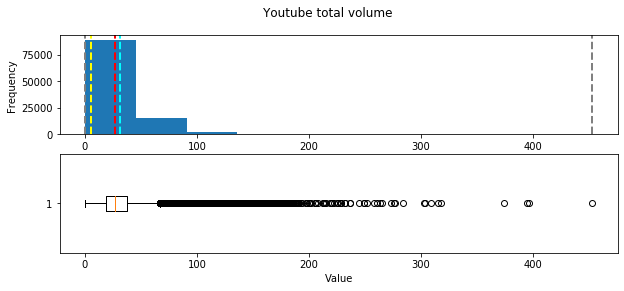

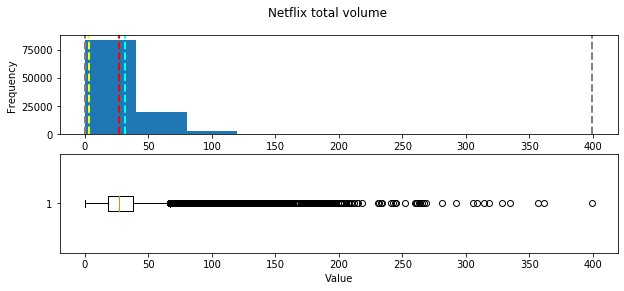

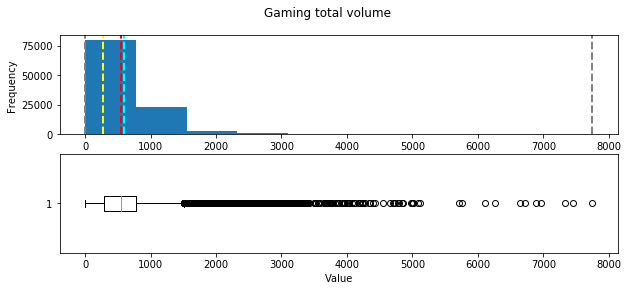

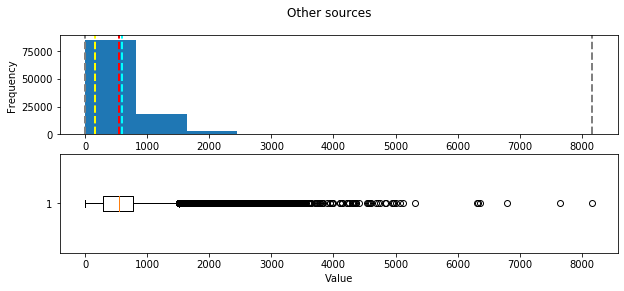

In [32]:
for col in scaled_sessions_df.columns.tolist():
  show_distribution(sessions_df[col])

### Data consumption

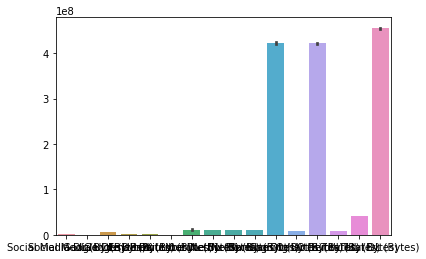

In [ ]:
g = sns.barplot(data=df[social_medias])

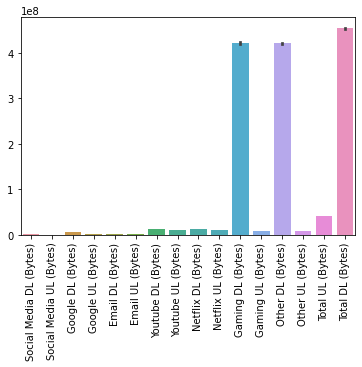

In [ ]:
import matplotlib.pyplot as plt
g = sns.barplot(data=df[social_medias])
g.set_xticklabels(labels=social_medias,rotation=90)
plt.show()

In [ ]:
social_media_object

[('Social Media DL (Bytes)', 269300061368.77365),
 ('Social Media UL (Bytes)', 4939298085.43438),
 ('Google DL (Bytes)', 862618643645.6193),
 ('Google UL (Bytes)', 308483345484.9263),
 ('Email DL (Bytes)', 268761121931.868),
 ('Email UL (Bytes)', 70106483664.44194),
 ('Youtube DL (Bytes)', 1745122509657.504),
 ('Youtube UL (Bytes)', 1651422529615.1348),
 ('Netflix DL (Bytes)', 1744039384662.7188),
 ('Netflix UL (Bytes)', 1650274224700.8196),
 ('Gaming DL (Bytes)', 63307127434008.59),
 ('Gaming UL (Bytes)', 1243268005008.1108),
 ('Other DL (Bytes)', 63165502729718.195),
 ('Other UL (Bytes)', 1239728178463.4243),
 ('Total UL (Bytes)', 6168180943816.0),
 ('Total DL (Bytes)', 68196514511845.0)]

['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']
[269300061368.77365, 4939298085.43438, 862618643645.6193, 308483345484.9263, 268761121931.868, 70106483664.44194, 1745122509657.504, 1651422529615.1348, 1744039384662.7188, 1650274224700.8196, 63307127434008.59, 1243268005008.1108, 63165502729718.195, 1239728178463.4243, 6168180943816.0, 68196514511845.0]


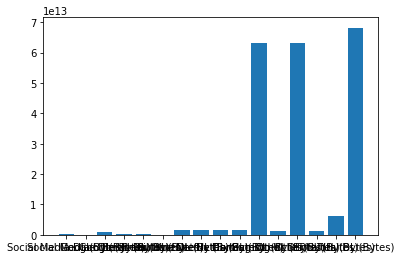

In [ ]:
import matplotlib.pyplot as plt
labels = [media[0] for media in social_media_object]
print(labels)
data = [data[1] for data in social_media_object]
print(data)
# g = sns.barplot(data=data)
# g.set_xticklabels(labels=labels,rotation=90)
plt.bar(x=labels, height=data)
plt.show()